In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

import nc_time_axis
import cftime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from cmocean import cm as cmo

from GG_mthesis import utils as utils

%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\gian_\\repos\\mthesis_gianlucca')
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

In [3]:
#define the path
path = '.\\data\\02_intermediate\\tsg_orchestra\\b1903933_transect.nc'

#open the dataset with the defined path
ds = xr.open_dataset(path) 

In [4]:
ds

<xarray.Dataset>
Dimensions:           (time: 2726)
Coordinates:
    lat               (time) float64 ...
    lon               (time) float64 ...
    depth             (time) float32 ...
  * time              (time) datetime64[ns] 2017-11-09T02:12:59.999680 ... 2017-11-10T23:37:59.997824
Data variables:
    attenuation       (time) float32 ...
    conductivity_tsg  (time) float32 ...
    chl-a             (time) float32 ...
    sal_tsg_cal       (time) float32 ...
    sal_tsg_nocal     (time) float32 ...
    temp_hull_1       (time) float32 ...
    temp_hull_2       (time) float32 ...
    temp_cond_tsg     (time) float32 ...
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

In [5]:
distance = []
for coord in range(len(ds.lat)-1):
    distance.append(utils.geo.getPathLength(ds.lat[coord],ds.lon[coord],ds.lat[coord+1],ds.lon[coord+1]))
distance = np.array(distance)
distance_cum = np.insert(np.cumsum(distance), 0, 0)

In [6]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

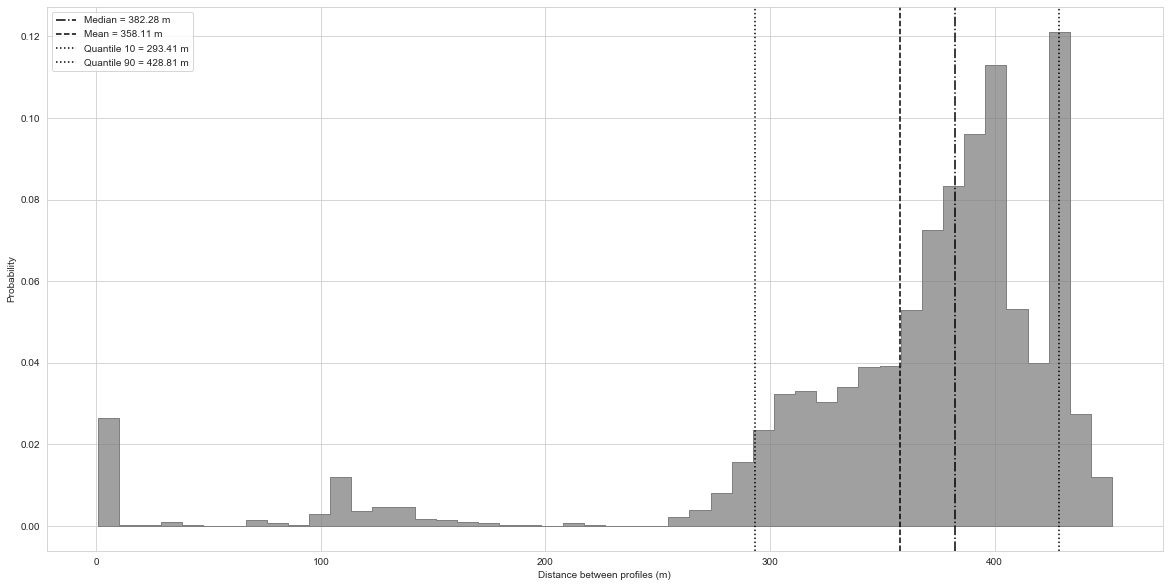

In [14]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(20,10))

#sns.histplot(distance, element='step', stat='density', color='grey', ax=ax0)
sns.histplot(distance, element='step', color='grey', stat='probability', ax=ax0)

for axis in [ax0]:
    axis.axvline(x=np.median(distance), label=str(('Median = ') + str(round(np.median(distance),2)) 
    + str(' m')), color='black', linestyle='-.')
    axis.axvline(x=np.mean(distance), label=str(('Mean = ') + str(round(np.mean(distance),2)) 
    + str(' m')), color='black', linestyle='--')
    axis.axvline(x=np.quantile(distance, .10), label=str(('Quantile 10 = ') + str(round(np.quantile(distance, .10),2)) 
    + str(' m')), color='black', linestyle=':',)
    axis.axvline(x=np.quantile(distance, .90), label=str(('Quantile 90 = ') + str(round(np.quantile(distance, .90),2)) 
    + str(' m')), color='black', linestyle=':')
    axis.legend(loc='upper left')
ax0.set(xlabel='Distance between profiles (m)')
plt.savefig('C:\\Users\\gian_\\repos\\mthesis_gianlucca\\results\\preprocessing\\distances_hist.png', bbox_inches='tight', format='png')